Rolling
nhung can fix lai

In [2]:
import pandas as pd

# Đọc dữ liệu từ file CSV
file_path = 'c:/Users/USER/OneDrive - TNDigi Digital Marketing/Attachments/Uyen/Project/Ellie/PROJECT/5. New Project/data/Xinwu_data/Related/testthudataa.csv'
data = pd.read_csv(file_path)

# Chuyển cột 'Time' về dạng datetime nếu chưa ở dạng này
data['Time'] = pd.to_datetime(data['Time'])

# Tạo cột PM_5 và PM_steam5 cho 5 phút trước
data['PM_5'] = data['PM'].shift(1)
data['PM_steam5'] = data['PM_steam'].shift(1)

# Tạo cột cho 10 phút trước (2 intervals of 5 minutes each)
data['PM_10'] = data['PM'].shift(2)
data['PM_steam10'] = data['PM_steam'].shift(2)

# Tạo cột cho 15 phút trước (3 intervals of 5 minutes each)
data['PM_15'] = data['PM'].shift(3)
data['PM_steam15'] = data['PM_steam'].shift(3)

# Tìm những ngày có giá trị thiếu
days_with_nan = data[data.isna().any(axis=1)]['Time'].dt.date.unique()

# Xóa toàn bộ các hàng thuộc những ngày có giá trị thiếu
data_cleaned = data[~data['Time'].dt.date.isin(days_with_nan)]

# Xuất kết quả ra màn hình
print(data_cleaned.head())

# Lưu lại file CSV nếu cần
output_file_path = 'c:/Users/USER/OneDrive - TNDigi Digital Marketing/Attachments/Uyen/Project/Ellie/PROJECT/5. New Project/data/Xinwu_data/Related/testthudataa_chia5phut.csv'
data_cleaned.to_csv(output_file_path, index=False)


                   Time     id_x   GCB07   GCB08   GCB09   GCB10   GCB11  \
288 2023-07-29 00:00:00  75245.0  3537.6  6825.0  4266.2  1265.6  1522.4   
289 2023-07-29 00:05:00  75250.0  3551.2  6749.2  4309.0  1286.6  1518.4   
290 2023-07-29 00:10:00  75255.0  3569.6  6814.8  4299.0  1313.4  1538.0   
291 2023-07-29 00:15:00  75260.0  3567.6  6727.0  4299.0  1282.6  1563.2   
292 2023-07-29 00:20:00  75265.0  3495.8  6795.4  4258.2  1302.2  1535.4   

      GCB13  GCB15   GCB16  ...       PM_s4      PM_s5       PM_s6      PM_s7  \
288  1879.6  865.2  2725.8  ...  106.421960  94.549988  113.167305  94.452072   
289  1856.8  840.8  2791.0  ...  103.898809  94.982863  111.607434  94.839280   
290  1918.0  839.0  2570.6  ...  104.606083  92.985915  111.098392  95.320246   
291  1942.4  860.6  2732.6  ...  107.293060  91.820512  112.691781  95.590623   
292  1949.4  831.6  2605.6  ...  103.881807  95.083913  113.773272  93.701389   

        PM_5   PM_steam5    PM_10  PM_steam10    PM_15  

In [3]:
import pandas as pd

# Đọc và chuẩn bị dữ liệu
data = pd.read_csv('c:/Users/USER/OneDrive - TNDigi Digital Marketing/Attachments/Uyen/Project/Ellie/PROJECT/5. New Project/data/Xinwu_data/Related/testthudataa_chia5phut.csv')
data = data.sort_values(by='Time')

# Định nghĩa tổng số mẫu và phần trăm chia
total_samples = len(data)
train_percentage = 0.8
val_percentage = 0.1
test_percentage = 0.1

# Tính toán số mẫu gần đúng cho mỗi tập và đảm bảo chia hết cho 288
train_samples = (int(total_samples * train_percentage) // 288) * 288
val_samples = (int(total_samples * val_percentage) // 288) * 288
test_samples = (total_samples - train_samples - val_samples) // 288 * 288

# Cập nhật lại số lượng mẫu của tập test nếu cần để đảm bảo đủ tổng số mẫu
remaining_samples = total_samples - (train_samples + val_samples + test_samples)
if remaining_samples >= 288:
    test_samples += 288  # Thêm 288 vào test nếu còn đủ số mẫu

# Chia dữ liệu thành các tập train, validation, test theo thứ tự thời gian
train_data = data[:train_samples]
val_data = data[train_samples:train_samples + val_samples]
test_data = data[train_samples + val_samples:train_samples + val_samples + test_samples]

# Lưu các tập dữ liệu vào các file CSV
train_data.to_csv(rf'c:\Users\USER\OneDrive - TNDigi Digital Marketing\Attachments\Uyen\Project\Ellie\PROJECT\5. New Project\data\Test rolling transformer\train.csv', index=False)
val_data.to_csv(rf'c:\Users\USER\OneDrive - TNDigi Digital Marketing\Attachments\Uyen\Project\Ellie\PROJECT\5. New Project\data\Test rolling transformer\valid.csv', index=False)
test_data.to_csv(rf'c:\Users\USER\OneDrive - TNDigi Digital Marketing\Attachments\Uyen\Project\Ellie\PROJECT\5. New Project\data\Test rolling transformer\test.csv', index=False)

print("Dữ liệu đã được chia và lưu vào các file CSV: train_data.csv, val_data.csv, test_data.csv")


Dữ liệu đã được chia và lưu vào các file CSV: train_data.csv, val_data.csv, test_data.csv


X_encoder shape: torch.Size([32, 29])
X_pm shape: torch.Size([32, 20])
X_pm_steam shape: torch.Size([32, 20])
y shape: torch.Size([32, 2])


/Users/nguyendinhhuy/Library/Python/3.9/lib/python/site-packages/torch/nn/modules/transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch 1/20, Training Loss: 0.1415
Epoch 1/20, Validation Loss: 0.1571
Epoch 2/20, Training Loss: 0.0918
Epoch 2/20, Validation Loss: 0.1580
Epoch 3/20, Training Loss: 0.0769
Epoch 3/20, Validation Loss: 0.1501
Epoch 4/20, Training Loss: 0.0675
Epoch 4/20, Validation Loss: 0.2122
Epoch 5/20, Training Loss: 0.0610
Epoch 5/20, Validation Loss: 0.2723
Epoch 6/20, Training Loss: 0.0560
Epoch 6/20, Validation Loss: 0.3328
Epoch 7/20, Training Loss: 0.0543
Epoch 7/20, Validation Loss: 0.3246
Epoch 8/20, Training Loss: 0.0529
Epoch 8/20, Validation Loss: 0.3747
Epoch 9/20, Training Loss: 0.0502
Epoch 9/20, Validation Loss: 0.3653
Epoch 10/20, Training Loss: 0.0489
Epoch 10/20, Validation Loss: 0.3977
Epoch 11/20, Training Loss: 0.0482
Epoch 11/20, Validation Loss: 0.3650
Epoch 12/20, Training Loss: 0.0467
Epoch 12/20, Validation Loss: 0.4011
Epoch 13/20, Training Loss: 0.0466
Epoch 13/20, Validation Loss: 0.3851
Early stopping triggered


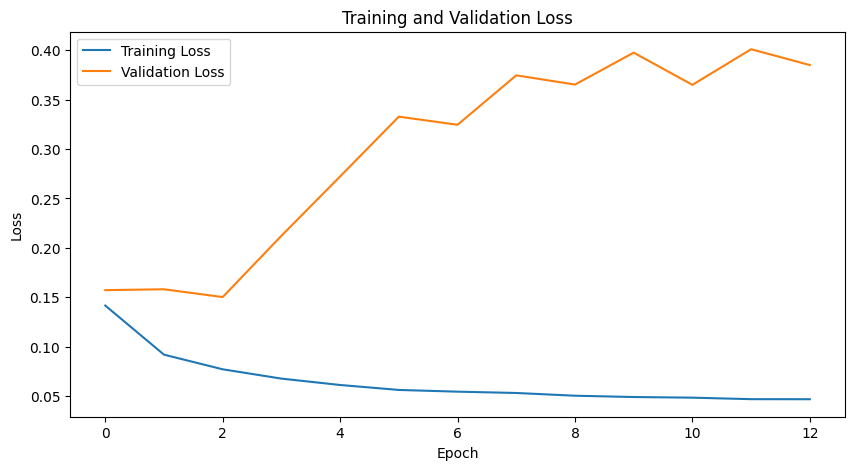

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.metrics import mean_absolute_error, r2_score

random.seed(100)
np.random.seed(100)
torch.manual_seed(100)
torch.cuda.manual_seed(100)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# Đọc dữ liệu từ các tệp CSV đã chia sẵn
train_data = pd.read_csv('/Users/nguyendinhhuy/Desktop/NCKU/Rolling/Rolling 12092024/train.csv')
val_data = pd.read_csv('/Users/nguyendinhhuy/Desktop/NCKU/Rolling/Rolling 12092024/valid.csv')
test_data = pd.read_csv('/Users/nguyendinhhuy/Desktop/NCKU/Rolling/Rolling 12092024/test.csv')

# Định nghĩa các đặc trưng
encoder_features = ['PM_lw1','PM_lw2', 'PM_lw3', 'PM_lw4', 'PM_lw5', 'PM_lw6', 'PM_lw7','PM_s1', 'PM_s2', 'PM_s3', 'PM_s4', 'PM_s5', 'PM_s6', 'PM_s7',
                    'Weekday', 'Timesteps', 'PaperCategory_y', 'qty', 'PM_f', 'day', 'month', 'hour', 'minute','PM_5','PM_steam5','PM_10','PM_steam10','PM_15','PM_steam15'
                    ]
pm_features = ['PM_lw1', 'PM_lw2', 'PM_lw3', 'PM_lw4', 'PM_lw5', 'PM_lw6', 'PM_lw7', 'Weekday', 'Timesteps', 'PaperCategory_y', 'qty', 'PM_f', 'day', 'month', 
               'hour', 'minute','PM_s1','PM_5','PM_10','PM_15']
pm_steam_features = ['PM_s1', 'PM_s2', 'PM_s3', 'PM_s4', 'PM_s5', 'PM_s6', 'PM_s7', 'Weekday', 'Timesteps', 'PaperCategory_y', 'qty', 'PM_f', 'day', 'month', 
                     'hour', 'minute','PM_lw1','PM_steam5','PM_steam10','PM_steam15']
y_columns = ['PM', 'PM_steam']

scaler_encoder = StandardScaler()
scaler_pm = StandardScaler()
scaler_pm_steam = StandardScaler()
scaler_y = StandardScaler()  # Thêm scaler cho y

def preprocess_data(data):
    X_encoder = scaler_encoder.fit_transform(data[encoder_features])
    X_pm = scaler_pm.fit_transform(data[pm_features])
    X_pm_steam = scaler_pm_steam.fit_transform(data[pm_steam_features])
    y = scaler_y.fit_transform(data[y_columns])  # Chuẩn hóa y
    return torch.tensor(X_encoder, dtype=torch.float32), torch.tensor(X_pm, dtype=torch.float32), torch.tensor(X_pm_steam, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)

# Tiền xử lý dữ liệu
X_train_enc, X_train_pm, X_train_pm_steam, y_train = preprocess_data(train_data)
X_val_enc, X_val_pm, X_val_pm_steam, y_val = preprocess_data(val_data)
X_test_enc, X_test_pm, X_test_pm_steam, y_test = preprocess_data(test_data)

# Tạo TensorDataset
train_dataset = TensorDataset(X_train_enc, X_train_pm, X_train_pm_steam, y_train)
val_dataset = TensorDataset(X_val_enc, X_val_pm, X_val_pm_steam, y_val)
test_dataset = TensorDataset(X_test_enc, X_test_pm, X_test_pm_steam, y_test)

# DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Kiểm tra kích thước của các tensor
for X_enc, X_pm, X_pm_steam, y in train_loader:
    print(f"X_encoder shape: {X_enc.shape}")
    print(f"X_pm shape: {X_pm.shape}")
    print(f"X_pm_steam shape: {X_pm_steam.shape}")
    print(f"y shape: {y.shape}")
    break  # Chỉ cần in kích thước của batch đầu tiên

# Định nghĩa mô hình với Dropout và Batch Normalization
class Encoder(nn.Module):
    def __init__(self, num_layers, d_model, dropout=0.1):
        super(Encoder, self).__init__()
        encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=8, dropout=dropout)
        self.encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.norm = nn.LayerNorm(d_model)

    def forward(self, x):
        x = self.encoder(x)
        return self.norm(x)

class Decoder(nn.Module):
    def __init__(self, num_layers, d_model, dropout=0.2):
        super(Decoder, self).__init__()
        decoder_layer = nn.TransformerDecoderLayer(d_model=d_model, nhead=8, dropout=dropout)
        self.decoder = nn.TransformerDecoder(decoder_layer, num_layers=num_layers)
        self.norm = nn.LayerNorm(d_model)
        self.output_layer = nn.Linear(d_model, 1)  # Output is a scalar per time step

    def forward(self, memory, x):
        x = self.decoder(x, memory)
        x = self.norm(x)
        x = self.output_layer(x)
        return x

class MultiDeT(nn.Module):
    def __init__(self, encoder_layers=4, decoder_layers=4, d_model=16, dropout=0.2):
        super(MultiDeT, self).__init__()
        self.encoder = Encoder(encoder_layers, d_model=d_model, dropout=dropout)
        self.decoder1 = Decoder(decoder_layers, d_model=d_model, dropout=dropout)
        self.decoder2 = Decoder(decoder_layers, d_model=d_model, dropout=dropout)

        self.encoderLinear = nn.Sequential(
            nn.Linear(29, d_model),
            nn.BatchNorm1d(d_model)  # Thêm BatchNorm1d
        )
        self.decoder1_Linear = nn.Sequential(
            nn.Linear(20, d_model),
            nn.BatchNorm1d(d_model)  # Thêm BatchNorm1d
        )
        self.decoder2_Linear = nn.Sequential(
            nn.Linear(20, d_model),
            nn.BatchNorm1d(d_model)  # Thêm BatchNorm1d
        )

    def forward(self, src, src_dec1, src_dec2):
        encoder_output = self.encoder(self.encoderLinear(src))

        decoder1_output = self.decoder1(encoder_output, self.decoder1_Linear(src_dec1))
        decoder2_output = self.decoder2(encoder_output, self.decoder2_Linear(src_dec2))

        return decoder1_output, decoder2_output

# Khởi tạo mô hình
model = MultiDeT()

# Định nghĩa hàm loss và optimizer với Weight Decay
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-3)  # Thêm weight_decay

# Hàm huấn luyện mô hình với Early Stopping
def train_model_with_early_stopping(model, train_loader, val_loader, criterion, optimizer, num_epochs=50, patience=10):
    train_losses = []
    val_losses = []
    best_val_loss = float('inf')
    patience_counter = 0

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for X_enc, X_pm, X_pm_steam, y in train_loader:
            optimizer.zero_grad()
            output1, output2 = model(X_enc, X_pm, X_pm_steam)

            # Reshape outputs to match the target shape
            output1 = output1.view(-1)
            output2 = output2.view(-1)

            # Calculate loss for each output
            loss1 = criterion(output1, y[:, 0])
            loss2 = criterion(output2, y[:, 1])

            # Combine the losses
            loss = 0.8 * loss1 + 0.2 * loss2
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * X_enc.size(0)

        epoch_loss = running_loss / len(train_loader.dataset)
        train_losses.append(epoch_loss)
        print(f'Epoch {epoch+1}/{num_epochs}, Training Loss: {epoch_loss:.4f}')

        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for X_enc, X_pm, X_pm_steam, y in val_loader:
                output1, output2 = model(X_enc, X_pm, X_pm_steam)

                # Reshape outputs to match the target shape
                output1 = output1.view(-1)
                output2 = output2.view(-1)

                # Calculate loss for each output
                loss1 = criterion(output1, y[:, 0])
                loss2 = criterion(output2, y[:, 1])

                # Combine the losses
                loss = 0.8 * loss1 + 0.2 * loss2
                val_loss += loss.item() * X_enc.size(0)

        val_loss = val_loss / len(val_loader.dataset)
        val_losses.append(val_loss)
        print(f'Epoch {epoch+1}/{num_epochs}, Validation Loss: {val_loss:.4f}')

        # Check for early stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience_counter = 0  # reset patience counter
            best_model_wts = model.state_dict()  # save the best model
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print("Early stopping triggered")
            model.load_state_dict(best_model_wts)  # load the best model weights
            break

    return train_losses, val_losses

# Huấn luyện mô hình với Early Stopping
train_losses, val_losses = train_model_with_early_stopping(model, train_loader, val_loader, criterion, optimizer, num_epochs=20, patience=10)

# Vẽ biểu đồ loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [2]:
import torch
import joblib

# Đường dẫn để lưu mô hình và scaler
model_save_path = 'best_model.pth'
scaler_y_save_path = 'scaler_y.pkl'

# Lưu mô hình với các trọng số tốt nhất
torch.save(model.state_dict(), model_save_path)
print(f"Model saved to {model_save_path}")

# Lưu scaler_y sử dụng joblib
joblib.dump(scaler_y, scaler_y_save_path)
print(f"Scaler saved to {scaler_y_save_path}")


Model saved to best_model.pth
Scaler saved to scaler_y.pkl


In [3]:
import torch
import joblib

# Đường dẫn để lưu mô hình và scaler
model_save_path = 'best_model.pth'
scaler_encoder_save_path = 'scaler_encoder.pkl'
scaler_pm_save_path = 'scaler_pm.pkl'
scaler_pm_steam_save_path = 'scaler_pm_steam.pkl'
scaler_y_save_path = 'scaler_y.pkl'

# Lưu mô hình với các trọng số tốt nhất
torch.save(model.state_dict(), model_save_path)
print(f"Model saved to {model_save_path}")
# Lưu các scaler đã sử dụng
joblib.dump(scaler_encoder, scaler_encoder_save_path)
print(f"Scaler for encoder features saved to {scaler_encoder_save_path}")
joblib.dump(scaler_pm, scaler_pm_save_path)
print(f"Scaler for PM features saved to {scaler_pm_save_path}")
joblib.dump(scaler_pm_steam, scaler_pm_steam_save_path)
print(f"Scaler for PM_steam features saved to {scaler_pm_steam_save_path}")
joblib.dump(scaler_y, scaler_y_save_path)
print(f"Scaler for target values saved to {scaler_y_save_path}")


Model saved to best_model.pth
Scaler for encoder features saved to scaler_encoder.pkl
Scaler for PM features saved to scaler_pm.pkl
Scaler for PM_steam features saved to scaler_pm_steam.pkl
Scaler for target values saved to scaler_y.pkl


In [4]:
import torch
import joblib
import numpy as np
import pandas as pd

# Đường dẫn để tải mô hình và scaler
model_load_path = 'best_model.pth'
scaler_encoder_load_path = 'scaler_encoder.pkl'
scaler_pm_load_path = 'scaler_pm.pkl'
scaler_pm_steam_load_path = 'scaler_pm_steam.pkl'
scaler_y_load_path = 'scaler_y.pkl'

# Khởi tạo lại mô hình với cùng cấu trúc
model = MultiDeT()  # Điều chỉnh cấu trúc nếu cần thiết
model.load_state_dict(torch.load(model_load_path))
model.eval()  # Đặt mô hình vào chế độ đánh giá
print(f"Model loaded successfully from {model_load_path}")

# Tải lại các scaler đã lưu
scaler_encoder = joblib.load(scaler_encoder_load_path)
print(f"Scaler for encoder features loaded from {scaler_encoder_load_path}")

scaler_pm = joblib.load(scaler_pm_load_path)
print(f"Scaler for PM features loaded from {scaler_pm_load_path}")

scaler_pm_steam = joblib.load(scaler_pm_steam_load_path)
print(f"Scaler for PM_steam features loaded from {scaler_pm_steam_load_path}")

scaler_y = joblib.load(scaler_y_load_path)
print(f"Scaler for target values loaded from {scaler_y_load_path}")


Model loaded successfully from best_model.pth
Scaler for encoder features loaded from scaler_encoder.pkl
Scaler for PM features loaded from scaler_pm.pkl
Scaler for PM_steam features loaded from scaler_pm_steam.pkl
Scaler for target values loaded from scaler_y.pkl


/Users/nguyendinhhuy/Library/Python/3.9/lib/python/site-packages/torch/nn/modules/transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
/var/folders/cm/nfg3lzjx1yb8gh0lpqtj20zc0000gn/T/ipykernel_4012/397347394.py:15: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary

In [5]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import joblib
# Khởi tạo và tải mô hình đã huấn luyện
model = MultiDeT()  # Giả sử MultiDeT() là class mô hình đã định nghĩa
model.load_state_dict(torch.load('best_model.pth'))
model.eval()  # Đặt mô hình vào chế độ đánh giá

# Tải các scaler đã lưu
scaler_encoder = joblib.load('scaler_encoder.pkl')
scaler_pm = joblib.load('scaler_pm.pkl')
scaler_pm_steam = joblib.load('scaler_pm_steam.pkl')
scaler_y = joblib.load('scaler_y.pkl')

# Đọc dữ liệu từ file CSV
data_file = "c:/Users/USER/OneDrive - TNDigi Digital Marketing/Attachments/Uyen/Project/Ellie/PROJECT/5. New Project/data/Test rolling transformer/test.csv"
df = pd.read_csv(data_file)

df = pd.read_csv(data_file)
df['time_label'] = pd.to_datetime({
    'year': 2024, 
    'month': df['month'], 
    'day': df['day'], 
    'hour': df['hour'], 
    'minute': df['minute']
})

all_features = set(encoder_features + pm_features + pm_steam_features)
for feature in all_features - set(df.columns):
    df[feature] = 0

/var/folders/cm/nfg3lzjx1yb8gh0lpqtj20zc0000gn/T/ipykernel_4012/144415565.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model.pt

FileNotFoundError: [Errno 2] No such file or directory: 'c:/Users/USER/OneDrive - TNDigi Digital Marketing/Attachments/Uyen/Project/Ellie/PROJECT/5. New Project/data/Test rolling transformer/test.csv'

In [ ]:

# Function to make a single prediction
def make_prediction(input_data):
    X_enc = input_data[encoder_features].to_frame().T
    X_pm = input_data[pm_features].to_frame().T
    X_pm_steam = input_data[pm_steam_features].to_frame().T
    
    X_enc_scaled = torch.tensor(scaler_encoder.transform(X_enc), dtype=torch.float32)
    X_pm_scaled = torch.tensor(scaler_pm.transform(X_pm), dtype=torch.float32)
    X_pm_steam_scaled = torch.tensor(scaler_pm_steam.transform(X_pm_steam), dtype=torch.float32)
    
    with torch.no_grad():
        output_pm, output_pm_steam = model(X_enc_scaled, X_pm_scaled, X_pm_steam_scaled)
        combined_output = torch.cat([output_pm, output_pm_steam], dim=1)
        y_pred = scaler_y.inverse_transform(combined_output.numpy())
    return y_pred[0, 0], y_pred[0, 1]  # PM and PM_steam predictions

## Initialize results storage
results = []

đoạn mã này cập nhật dữ liệu bị sai

In [ ]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import joblib

# Perform rolling forecasts
start_date = pd.Timestamp('2024-06-25 00:05:00')  # Bắt đầu từ 00:05
end_date = pd.Timestamp('2024-06-25 23:55:00')
forecast_interval = pd.Timedelta(minutes=5)

results = []

while start_date <= end_date:
    print(f"Starting forecast from {start_date}")
    
    # Initialize forecast data for this run
    forecast_data = df[df['time_label'] < start_date].copy()
    current_time = start_date
    
    predictions_pm = []
    predictions_pm_steam = []
    actuals_pm = []
    actuals_pm_steam = []
    forecast_times = []
    
    while current_time <= end_date:
        # Get input data for the current time
        input_data = df[df['time_label'] == current_time]
        if input_data.empty:
            print(f"No data available for time {current_time}. Skipping to next interval.")
            current_time += forecast_interval
            continue

        input_data = input_data.iloc[0]

        # Make prediction
        pred_pm, pred_pm_steam = make_prediction(input_data)

        # Store results
        predictions_pm.append(pred_pm)
        predictions_pm_steam.append(pred_pm_steam)
        actuals_pm.append(input_data['PM_5'])
        actuals_pm_steam.append(input_data['PM_steam5'])
        forecast_times.append(current_time)

        # Create a new row for the next time step
        next_time = current_time + forecast_interval
        new_row = input_data.copy()  # Start from the last known input_data
        new_row['time_label'] = next_time
        new_row['PM_5'] = pred_pm
        new_row['PM_steam5'] = pred_pm_steam

        # Dynamically update Weekday, Timesteps, and other relevant features
        new_row['Weekday'] = next_time.weekday()  # Update based on the next time step
        new_row['Timesteps'] = (next_time - pd.Timestamp('2024-06-25 00:00:00')).total_seconds() // 60

        # Append the new row to forecast_data using pd.concat
        forecast_data = pd.concat([forecast_data, new_row.to_frame().T], ignore_index=True)
        
        # Move to next time step
        current_time = next_time

    # Calculate MAPE for this forecast run
    mape_pm = np.mean(np.abs((np.array(actuals_pm) - np.array(predictions_pm)) / np.array(actuals_pm))) * 100
    mape_pm_steam = np.mean(np.abs((np.array(actuals_pm_steam) - np.array(predictions_pm_steam)) / np.array(actuals_pm_steam))) * 100
    
    results.append({
        'start_time': start_date,
        'mape_pm': mape_pm,
        'mape_pm_steam': mape_pm_steam,
        'predictions_pm': predictions_pm,
        'predictions_pm_steam': predictions_pm_steam,
        'actuals_pm': actuals_pm,
        'actuals_pm_steam': actuals_pm_steam,
        'forecast_times': forecast_times
    })
    
    print(f"MAPE for PM: {mape_pm:.2f}%, MAPE for PM_steam: {mape_pm_steam:.2f}%")
    
    # Move to next start time
    start_date += forecast_interval

# Calculate overall average MAPE
avg_mape_pm = np.mean([r['mape_pm'] for r in results])
avg_mape_pm_steam = np.mean([r['mape_pm_steam'] for r in results])

print(f"Overall average MAPE for PM: {avg_mape_pm:.2f}%")
print(f"Overall average MAPE for PM_steam: {avg_mape_pm_steam:.2f}%")


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Giả sử bạn đã lưu các dự báo và giá trị thực tế từ kết quả dự báo cuộn
# Ví dụ:
# results chứa danh sách các từ điển, mỗi từ điển chứa thông tin dự báo và thực tế từ các khoảng thời gian khác nhau

# Lấy tất cả các dự báo và giá trị thực tế
all_predictions_pm = [result['predictions_pm'] for result in results]
all_actuals_pm = [result['actuals_pm'] for result in results]
all_predictions_pm_steam = [result['predictions_pm_steam'] for result in results]
all_actuals_pm_steam = [result['actuals_pm_steam'] for result in results]
forecast_times = [result['forecast_times'] for result in results]

# Xác định các thời điểm cụ thể và các chỉ số tương ứng
specific_times = ['00:00', '05:00', '10:00', '15:00', '23:00']
specific_time_indices = [0, 60, 120, 180, 276]  # Giả sử các khoảng thời gian 5 phút tương ứng với các chỉ số này

# Đảm bảo các chỉ số nằm trong phạm vi
specific_time_indices = [i for i in specific_time_indices if i < len(all_predictions_pm)]

# Vẽ biểu đồ cho PM
plt.figure(figsize=(15, 3))
plt.plot(forecast_times[0], all_actuals_pm[0], label='Actual PM', color='blue', linewidth=2)

# Vẽ các giá trị dự báo tại các thời điểm chỉ định cho PM
for idx, time_idx in enumerate(specific_time_indices):
    if time_idx < len(all_predictions_pm):
        predictions_pm = all_predictions_pm[time_idx]
        time_label = forecast_times[time_idx]  # Đảm bảo chỉ số chính xác
        plt.plot(time_label, predictions_pm, linestyle='--', label=f'Forecast PM at {specific_times[idx]}', alpha=0.7)

plt.xlabel('Time')
plt.ylabel('PM Value')
plt.title('Rolling Forecast vs Actual PM on 25th June 2024')
plt.legend(loc='upper right')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Vẽ biểu đồ cho PM_steam
plt.figure(figsize=(15, 3))
plt.plot(forecast_times[0], all_actuals_pm_steam[0], label='Actual PM_steam', color='green', linewidth=2)

# Vẽ các giá trị dự báo tại các thời điểm chỉ định cho PM_steam
for idx, time_idx in enumerate(specific_time_indices):
    if time_idx < len(all_predictions_pm_steam):
        predictions_pm_steam = all_predictions_pm_steam[time_idx]
        time_label = forecast_times[time_idx]  # Đảm bảo chỉ số chính xác
        plt.plot(time_label, predictions_pm_steam, linestyle='--', label=f'Forecast PM_steam at {specific_times[idx]}', alpha=0.7)

plt.xlabel('Time')
plt.ylabel('PM_steam Value')
plt.title('Rolling Forecast vs Actual PM_steam on 25th June 2024')
plt.legend(loc='upper right')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


dựa vào đoạn mã này để cập nhật dữ liệu

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.preprocessing import StandardScaler

# Load trained model and scaler
randomized_model = joblib.load('trained_model.pkl')
scaler = joblib.load('scaler.pkl')

# Load the entire dataset from the single CSV file
data_file = "c:/Users/USER/OneDrive - TNDigi Digital Marketing/Attachments/Uyen/Code/4. Xinwu/test_data_PM.csv"
df = pd.read_csv(data_file)

# Create datetime labels from hour and minute
df['time_label'] = pd.to_datetime({
    'year': 2024, 
    'month': df['month'], 
    'day': df['day'], 
    'hour': df['hour'], 
    'minute': df['minute']
})

# Generate a list of overlapping time intervals
time_intervals = pd.date_range(start='2024-06-12 00:00:00', end='2024-06-12 23:55:00', freq='5T')

mape_scores = []
all_predictions = []
time_labels = []
all_actuals = []

feature_names = ['PM_lw1', 'PM_lw2', 'PM_lw3', 'PM_lw4', 
                 'PM_lw5', 'PM_lw6', 'PM_lw7', 'Weekday', 'Timesteps',
                 'PaperCategory_y', 'qty', 'PM_f', 'day', 'month',
                 'hour', 'minute','PM_5','PM_10','PM_15']

# Perform rolling forecast for each interval
for start_time in time_intervals:
    end_time = pd.to_datetime('2024-06-12 23:59:00')
    test_data = df[(df['time_label'] >= start_time) & (df['time_label'] < end_time)]
    
    # Sort data by time
    test_data = test_data.sort_values('time_label')

    predictions = []
    current_test_data = test_data.copy()

    for i in range(len(test_data)):
        # Get the current feature set for prediction
        X_test = current_test_data.iloc[i][feature_names].values.reshape(1, -1)

        # Scale the data
        X_test_scaled = scaler.transform(X_test)

        # Perform the prediction
        y_pred = randomized_model.predict(X_test_scaled)[0]
        predictions.append(y_pred)

        # Update the PM_5 value for the next prediction
        if i + 1 < len(current_test_data):
            next_time = current_test_data.iloc[i + 1]['time_label']
            current_test_data.loc[current_test_data['time_label'] == next_time, 'PM_5'] = y_pred  # Update with the predicted value

    # Ensure predictions match actual values in length
    if len(predictions) < len(test_data):
        # If there are fewer predictions, fill with NaNs or a placeholder
        predictions.extend([np.nan] * (len(test_data) - len(predictions)))

    # Align the number of predictions with the number of actual values
    y_true = test_data['PM'].iloc[:len(predictions)].values
    y_pred = np.array(predictions)
    
    # Filter out NaNs and zero actual values
    valid_idx = (y_true != 0) & (~np.isnan(y_pred))
    if len(y_true[valid_idx]) > 0:
        mape = np.mean(np.abs((y_true[valid_idx] - y_pred[valid_idx]) / y_true[valid_idx])) * 100
    else:
        mape = np.nan  # If no valid data points, set MAPE to NaN
    
    mape_scores.append(mape)

    all_predictions.append(predictions)
    time_labels.append(test_data['time_label'].values)
    all_actuals.append(y_true)

    print(f"MAPE for forecast starting from {start_time.strftime('%H:%M')} is: {mape:.2f}%")

# Calculate average MAPE for all time intervals
valid_mape_scores = [score for score in mape_scores if not np.isnan(score)]
average_mape = np.mean(valid_mape_scores) if valid_mape_scores else np.nan
print(f"Average MAPE for all forecast intervals: {average_mape:.2f}%")

# Define the specific intervals you want to plot
specific_times = ['00:00', '05:00', '10:00', '15:00', '20:00', '23:00']
intervals_to_plot = [i for i, time in enumerate(time_intervals.strftime('%H:%M')) if time in specific_times]

# Plotting results
plt.figure(figsize=(15, 3))

# Plot actual values (only once)
plt.plot(time_labels[0], all_actuals[0], label='Actual PM', color='blue')

# Plot predictions for selected intervals
for idx in intervals_to_plot:
    plt.plot(time_labels[idx], all_predictions[idx], linestyle='--', label=f'Prediction for {time_intervals[idx].strftime("%H:%M")}')

plt.xlabel('Time')
plt.ylabel('PM Value')
plt.title('Forecast Intervals for Specific Times on 12th June 2024')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# **TEST**

X_encoder shape: torch.Size([32, 29])
X_pm shape: torch.Size([32, 20])
X_pm_steam shape: torch.Size([32, 20])
y shape: torch.Size([32, 2])


/Users/nguyendinhhuy/Library/Python/3.9/lib/python/site-packages/torch/nn/modules/transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch 1/20, Training Loss: 0.1415
Epoch 1/20, Validation Loss: 0.1571
Epoch 2/20, Training Loss: 0.0918
Epoch 2/20, Validation Loss: 0.1580
Epoch 3/20, Training Loss: 0.0769
Epoch 3/20, Validation Loss: 0.1501
Epoch 4/20, Training Loss: 0.0675
Epoch 4/20, Validation Loss: 0.2122
Epoch 5/20, Training Loss: 0.0610
Epoch 5/20, Validation Loss: 0.2723
Epoch 6/20, Training Loss: 0.0560
Epoch 6/20, Validation Loss: 0.3328
Epoch 7/20, Training Loss: 0.0543
Epoch 7/20, Validation Loss: 0.3246
Epoch 8/20, Training Loss: 0.0529
Epoch 8/20, Validation Loss: 0.3747
Epoch 9/20, Training Loss: 0.0502
Epoch 9/20, Validation Loss: 0.3653
Epoch 10/20, Training Loss: 0.0489
Epoch 10/20, Validation Loss: 0.3977
Epoch 11/20, Training Loss: 0.0482
Epoch 11/20, Validation Loss: 0.3650
Epoch 12/20, Training Loss: 0.0467
Epoch 12/20, Validation Loss: 0.4011
Epoch 13/20, Training Loss: 0.0466
Epoch 13/20, Validation Loss: 0.3851
Early stopping triggered


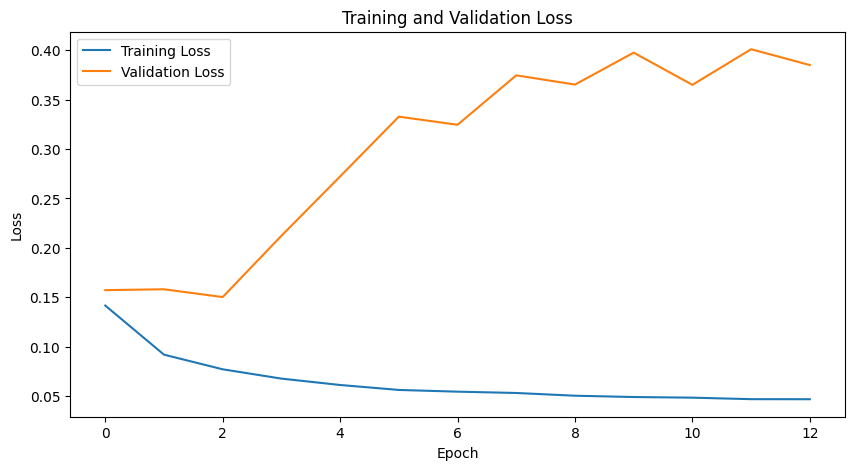

Model saved to best_model.pth
Scaler saved to scaler_y.pkl
Model saved to best_model.pth
Scaler for encoder features saved to scaler_encoder.pkl
Scaler for PM features saved to scaler_pm.pkl
Scaler for PM_steam features saved to scaler_pm_steam.pkl
Scaler for target values saved to scaler_y.pkl
Model loaded successfully from best_model.pth
Scaler for encoder features loaded from scaler_encoder.pkl
Scaler for PM features loaded from scaler_pm.pkl
Scaler for PM_steam features loaded from scaler_pm_steam.pkl
Scaler for target values loaded from scaler_y.pkl
Starting forecast from 2024-06-25 00:05:00


/var/folders/cm/nfg3lzjx1yb8gh0lpqtj20zc0000gn/T/ipykernel_4012/3857074236.py:268: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_load_

MAPE for PM: 9.22%, MAPE for PM_steam: 10.83%
Starting forecast from 2024-06-25 00:10:00
MAPE for PM: 9.22%, MAPE for PM_steam: 10.87%
Starting forecast from 2024-06-25 00:15:00
MAPE for PM: 9.22%, MAPE for PM_steam: 10.89%
Starting forecast from 2024-06-25 00:20:00
MAPE for PM: 9.22%, MAPE for PM_steam: 10.92%
Starting forecast from 2024-06-25 00:25:00
MAPE for PM: 9.22%, MAPE for PM_steam: 10.94%
Starting forecast from 2024-06-25 00:30:00
MAPE for PM: 9.23%, MAPE for PM_steam: 10.95%
Starting forecast from 2024-06-25 00:35:00
MAPE for PM: 9.24%, MAPE for PM_steam: 10.97%
Starting forecast from 2024-06-25 00:40:00
MAPE for PM: 9.26%, MAPE for PM_steam: 10.99%
Starting forecast from 2024-06-25 00:45:00
MAPE for PM: 9.28%, MAPE for PM_steam: 11.01%
Starting forecast from 2024-06-25 00:50:00
MAPE for PM: 9.30%, MAPE for PM_steam: 11.02%
Starting forecast from 2024-06-25 00:55:00
MAPE for PM: 9.32%, MAPE for PM_steam: 11.04%
Starting forecast from 2024-06-25 01:00:00
MAPE for PM: 9.34%, M

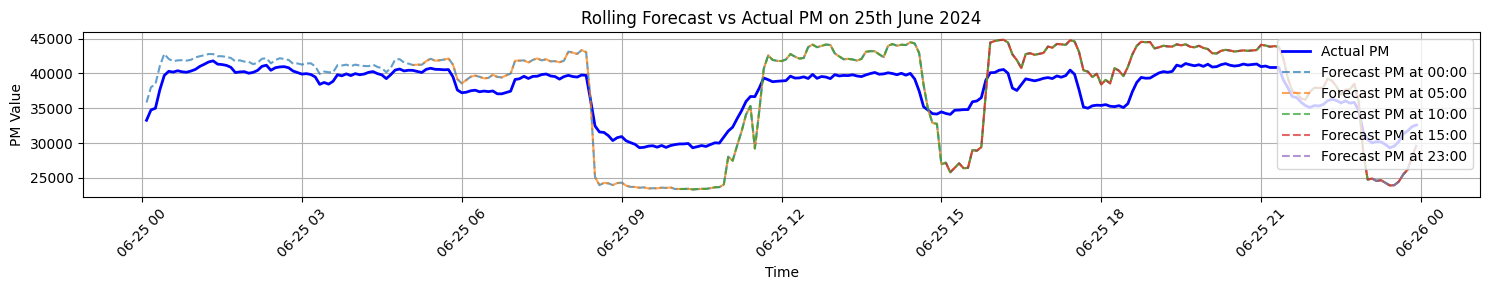

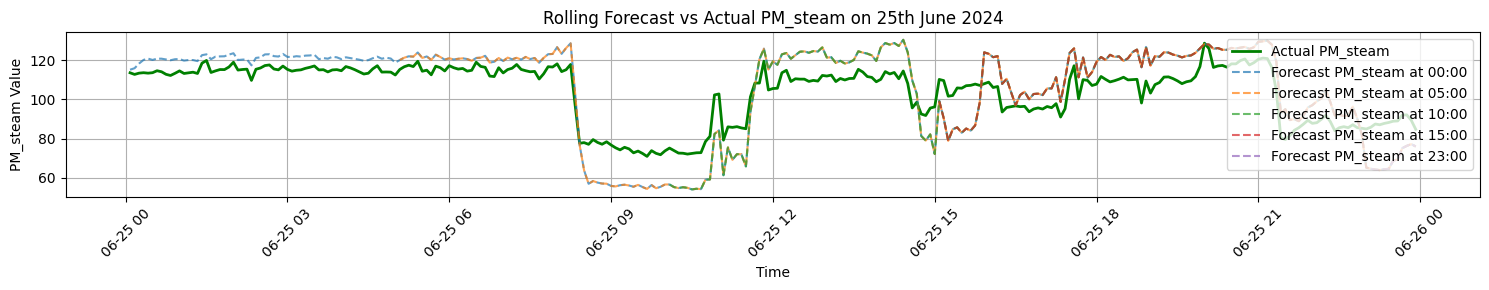

In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.metrics import mean_absolute_error, r2_score

random.seed(100)
np.random.seed(100)
torch.manual_seed(100)
torch.cuda.manual_seed(100)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# Đọc dữ liệu từ các tệp CSV đã chia sẵn
train_data = pd.read_csv('/Users/nguyendinhhuy/Desktop/NCKU/Rolling/Rolling 12092024/train.csv')
val_data = pd.read_csv('/Users/nguyendinhhuy/Desktop/NCKU/Rolling/Rolling 12092024/valid.csv')
test_data = pd.read_csv('/Users/nguyendinhhuy/Desktop/NCKU/Rolling/Rolling 12092024/test.csv')

# Định nghĩa các đặc trưng
encoder_features = ['PM_lw1','PM_lw2', 'PM_lw3', 'PM_lw4', 'PM_lw5', 'PM_lw6', 'PM_lw7','PM_s1', 'PM_s2', 'PM_s3', 'PM_s4', 'PM_s5', 'PM_s6', 'PM_s7',
                    'Weekday', 'Timesteps', 'PaperCategory_y', 'qty', 'PM_f', 'day', 'month', 'hour', 'minute','PM_5','PM_steam5','PM_10','PM_steam10','PM_15','PM_steam15'
                    ]
pm_features = ['PM_lw1', 'PM_lw2', 'PM_lw3', 'PM_lw4', 'PM_lw5', 'PM_lw6', 'PM_lw7', 'Weekday', 'Timesteps', 'PaperCategory_y', 'qty', 'PM_f', 'day', 'month', 
               'hour', 'minute','PM_s1','PM_5','PM_10','PM_15']
pm_steam_features = ['PM_s1', 'PM_s2', 'PM_s3', 'PM_s4', 'PM_s5', 'PM_s6', 'PM_s7', 'Weekday', 'Timesteps', 'PaperCategory_y', 'qty', 'PM_f', 'day', 'month', 
                     'hour', 'minute','PM_lw1','PM_steam5','PM_steam10','PM_steam15']
y_columns = ['PM', 'PM_steam']

scaler_encoder = StandardScaler()
scaler_pm = StandardScaler()
scaler_pm_steam = StandardScaler()
scaler_y = StandardScaler()  # Thêm scaler cho y

def preprocess_data(data):
    X_encoder = scaler_encoder.fit_transform(data[encoder_features])
    X_pm = scaler_pm.fit_transform(data[pm_features])
    X_pm_steam = scaler_pm_steam.fit_transform(data[pm_steam_features])
    y = scaler_y.fit_transform(data[y_columns])  # Chuẩn hóa y
    return torch.tensor(X_encoder, dtype=torch.float32), torch.tensor(X_pm, dtype=torch.float32), torch.tensor(X_pm_steam, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)

# Tiền xử lý dữ liệu
X_train_enc, X_train_pm, X_train_pm_steam, y_train = preprocess_data(train_data)
X_val_enc, X_val_pm, X_val_pm_steam, y_val = preprocess_data(val_data)
X_test_enc, X_test_pm, X_test_pm_steam, y_test = preprocess_data(test_data)

# Tạo TensorDataset
train_dataset = TensorDataset(X_train_enc, X_train_pm, X_train_pm_steam, y_train)
val_dataset = TensorDataset(X_val_enc, X_val_pm, X_val_pm_steam, y_val)
test_dataset = TensorDataset(X_test_enc, X_test_pm, X_test_pm_steam, y_test)

# DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Kiểm tra kích thước của các tensor
for X_enc, X_pm, X_pm_steam, y in train_loader:
    print(f"X_encoder shape: {X_enc.shape}")
    print(f"X_pm shape: {X_pm.shape}")
    print(f"X_pm_steam shape: {X_pm_steam.shape}")
    print(f"y shape: {y.shape}")
    break  # Chỉ cần in kích thước của batch đầu tiên

# Định nghĩa mô hình với Dropout và Batch Normalization
class Encoder(nn.Module):
    def __init__(self, num_layers, d_model, dropout=0.1):
        super(Encoder, self).__init__()
        encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=8, dropout=dropout)
        self.encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.norm = nn.LayerNorm(d_model)

    def forward(self, x):
        x = self.encoder(x)
        return self.norm(x)

class Decoder(nn.Module):
    def __init__(self, num_layers, d_model, dropout=0.2):
        super(Decoder, self).__init__()
        decoder_layer = nn.TransformerDecoderLayer(d_model=d_model, nhead=8, dropout=dropout)
        self.decoder = nn.TransformerDecoder(decoder_layer, num_layers=num_layers)
        self.norm = nn.LayerNorm(d_model)
        self.output_layer = nn.Linear(d_model, 1)  # Output is a scalar per time step

    def forward(self, memory, x):
        x = self.decoder(x, memory)
        x = self.norm(x)
        x = self.output_layer(x)
        return x

class MultiDeT(nn.Module):
    def __init__(self, encoder_layers=4, decoder_layers=4, d_model=16, dropout=0.2):
        super(MultiDeT, self).__init__()
        self.encoder = Encoder(encoder_layers, d_model=d_model, dropout=dropout)
        self.decoder1 = Decoder(decoder_layers, d_model=d_model, dropout=dropout)
        self.decoder2 = Decoder(decoder_layers, d_model=d_model, dropout=dropout)

        self.encoderLinear = nn.Sequential(
            nn.Linear(29, d_model),
            nn.BatchNorm1d(d_model)  # Thêm BatchNorm1d
        )
        self.decoder1_Linear = nn.Sequential(
            nn.Linear(20, d_model),
            nn.BatchNorm1d(d_model)  # Thêm BatchNorm1d
        )
        self.decoder2_Linear = nn.Sequential(
            nn.Linear(20, d_model),
            nn.BatchNorm1d(d_model)  # Thêm BatchNorm1d
        )

    def forward(self, src, src_dec1, src_dec2):
        encoder_output = self.encoder(self.encoderLinear(src))

        decoder1_output = self.decoder1(encoder_output, self.decoder1_Linear(src_dec1))
        decoder2_output = self.decoder2(encoder_output, self.decoder2_Linear(src_dec2))

        return decoder1_output, decoder2_output

# Khởi tạo mô hình
model = MultiDeT()

# Định nghĩa hàm loss và optimizer với Weight Decay
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-3)  # Thêm weight_decay

# Hàm huấn luyện mô hình với Early Stopping
def train_model_with_early_stopping(model, train_loader, val_loader, criterion, optimizer, num_epochs=50, patience=10):
    train_losses = []
    val_losses = []
    best_val_loss = float('inf')
    patience_counter = 0

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for X_enc, X_pm, X_pm_steam, y in train_loader:
            optimizer.zero_grad()
            output1, output2 = model(X_enc, X_pm, X_pm_steam)

            # Reshape outputs to match the target shape
            output1 = output1.view(-1)
            output2 = output2.view(-1)

            # Calculate loss for each output
            loss1 = criterion(output1, y[:, 0])
            loss2 = criterion(output2, y[:, 1])

            # Combine the losses
            loss = 0.8 * loss1 + 0.2 * loss2
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * X_enc.size(0)

        epoch_loss = running_loss / len(train_loader.dataset)
        train_losses.append(epoch_loss)
        print(f'Epoch {epoch+1}/{num_epochs}, Training Loss: {epoch_loss:.4f}')

        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for X_enc, X_pm, X_pm_steam, y in val_loader:
                output1, output2 = model(X_enc, X_pm, X_pm_steam)

                # Reshape outputs to match the target shape
                output1 = output1.view(-1)
                output2 = output2.view(-1)

                # Calculate loss for each output
                loss1 = criterion(output1, y[:, 0])
                loss2 = criterion(output2, y[:, 1])

                # Combine the losses
                loss = 0.8 * loss1 + 0.2 * loss2
                val_loss += loss.item() * X_enc.size(0)

        val_loss = val_loss / len(val_loader.dataset)
        val_losses.append(val_loss)
        print(f'Epoch {epoch+1}/{num_epochs}, Validation Loss: {val_loss:.4f}')

        # Check for early stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience_counter = 0  # reset patience counter
            best_model_wts = model.state_dict()  # save the best model
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print("Early stopping triggered")
            model.load_state_dict(best_model_wts)  # load the best model weights
            break

    return train_losses, val_losses

# Huấn luyện mô hình với Early Stopping
train_losses, val_losses = train_model_with_early_stopping(model, train_loader, val_loader, criterion, optimizer, num_epochs=20, patience=10)

# Vẽ biểu đồ loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

import torch
import joblib

# Đường dẫn để lưu mô hình và scaler
model_save_path = 'best_model.pth'
scaler_y_save_path = 'scaler_y.pkl'

# Lưu mô hình với các trọng số tốt nhất
torch.save(model.state_dict(), model_save_path)
print(f"Model saved to {model_save_path}")

# Lưu scaler_y sử dụng joblib
joblib.dump(scaler_y, scaler_y_save_path)
print(f"Scaler saved to {scaler_y_save_path}")



import torch
import joblib

# Đường dẫn để lưu mô hình và scaler
model_save_path = 'best_model.pth'
scaler_encoder_save_path = 'scaler_encoder.pkl'
scaler_pm_save_path = 'scaler_pm.pkl'
scaler_pm_steam_save_path = 'scaler_pm_steam.pkl'
scaler_y_save_path = 'scaler_y.pkl'

# Lưu mô hình với các trọng số tốt nhất
torch.save(model.state_dict(), model_save_path)
print(f"Model saved to {model_save_path}")
# Lưu các scaler đã sử dụng
joblib.dump(scaler_encoder, scaler_encoder_save_path)
print(f"Scaler for encoder features saved to {scaler_encoder_save_path}")
joblib.dump(scaler_pm, scaler_pm_save_path)
print(f"Scaler for PM features saved to {scaler_pm_save_path}")
joblib.dump(scaler_pm_steam, scaler_pm_steam_save_path)
print(f"Scaler for PM_steam features saved to {scaler_pm_steam_save_path}")
joblib.dump(scaler_y, scaler_y_save_path)
print(f"Scaler for target values saved to {scaler_y_save_path}")



import torch
import joblib
import numpy as np
import pandas as pd

# Đường dẫn để tải mô hình và scaler
model_load_path = 'best_model.pth'
scaler_encoder_load_path = 'scaler_encoder.pkl'
scaler_pm_load_path = 'scaler_pm.pkl'
scaler_pm_steam_load_path = 'scaler_pm_steam.pkl'
scaler_y_load_path = 'scaler_y.pkl'

# Khởi tạo lại mô hình với cùng cấu trúc
model = MultiDeT()  # Điều chỉnh cấu trúc nếu cần thiết
model.load_state_dict(torch.load(model_load_path))
model.eval()  # Đặt mô hình vào chế độ đánh giá
print(f"Model loaded successfully from {model_load_path}")

# Tải lại các scaler đã lưu
scaler_encoder = joblib.load(scaler_encoder_load_path)
print(f"Scaler for encoder features loaded from {scaler_encoder_load_path}")

scaler_pm = joblib.load(scaler_pm_load_path)
print(f"Scaler for PM features loaded from {scaler_pm_load_path}")

scaler_pm_steam = joblib.load(scaler_pm_steam_load_path)
print(f"Scaler for PM_steam features loaded from {scaler_pm_steam_load_path}")

scaler_y = joblib.load(scaler_y_load_path)
print(f"Scaler for target values loaded from {scaler_y_load_path}")






import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import joblib
# Khởi tạo và tải mô hình đã huấn luyện
model = MultiDeT()  # Giả sử MultiDeT() là class mô hình đã định nghĩa
model.load_state_dict(torch.load('best_model.pth'))
model.eval()  # Đặt mô hình vào chế độ đánh giá

# Tải các scaler đã lưu
scaler_encoder = joblib.load('scaler_encoder.pkl')
scaler_pm = joblib.load('scaler_pm.pkl')
scaler_pm_steam = joblib.load('scaler_pm_steam.pkl')
scaler_y = joblib.load('scaler_y.pkl')

# Đọc dữ liệu từ file CSV
data_file = "/Users/nguyendinhhuy/Desktop/NCKU/Rolling/Rolling 12092024/test.csv"
df = pd.read_csv(data_file)

df = pd.read_csv(data_file)
df['time_label'] = pd.to_datetime({
    'year': 2024, 
    'month': df['month'], 
    'day': df['day'], 
    'hour': df['hour'], 
    'minute': df['minute']
})

all_features = set(encoder_features + pm_features + pm_steam_features)
for feature in all_features - set(df.columns):
    df[feature] = 0



# Function to make a single prediction
def make_prediction(input_data):
    X_enc = input_data[encoder_features].to_frame().T
    X_pm = input_data[pm_features].to_frame().T
    X_pm_steam = input_data[pm_steam_features].to_frame().T
    
    X_enc_scaled = torch.tensor(scaler_encoder.transform(X_enc), dtype=torch.float32)
    X_pm_scaled = torch.tensor(scaler_pm.transform(X_pm), dtype=torch.float32)
    X_pm_steam_scaled = torch.tensor(scaler_pm_steam.transform(X_pm_steam), dtype=torch.float32)
    
    with torch.no_grad():
        output_pm, output_pm_steam = model(X_enc_scaled, X_pm_scaled, X_pm_steam_scaled)
        combined_output = torch.cat([output_pm, output_pm_steam], dim=1)
        y_pred = scaler_y.inverse_transform(combined_output.numpy())
    return y_pred[0, 0], y_pred[0, 1]  # PM and PM_steam predictions

## Initialize results storage
results = []


import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import joblib

# Perform rolling forecasts
start_date = pd.Timestamp('2024-06-25 00:05:00')  # Bắt đầu từ 00:05
end_date = pd.Timestamp('2024-06-25 23:55:00')
forecast_interval = pd.Timedelta(minutes=5)

results = []

while start_date <= end_date:
    print(f"Starting forecast from {start_date}")
    
    # Initialize forecast data for this run
    forecast_data = df[df['time_label'] < start_date].copy()
    current_time = start_date
    
    predictions_pm = []
    predictions_pm_steam = []
    actuals_pm = []
    actuals_pm_steam = []
    forecast_times = []
    
    while current_time <= end_date:
        # Get input data for the current time
        input_data = df[df['time_label'] == current_time]
        if input_data.empty:
            print(f"No data available for time {current_time}. Skipping to next interval.")
            current_time += forecast_interval
            continue

        input_data = input_data.iloc[0]

        # Make prediction
        pred_pm, pred_pm_steam = make_prediction(input_data)

        # Store results
        predictions_pm.append(pred_pm)
        predictions_pm_steam.append(pred_pm_steam)
        actuals_pm.append(input_data['PM_5'])
        actuals_pm_steam.append(input_data['PM_steam5'])
        forecast_times.append(current_time)

        # Create a new row for the next time step
        next_time = current_time + forecast_interval
        new_row = input_data.copy()  # Start from the last known input_data
        new_row['time_label'] = next_time
        new_row['PM_5'] = pred_pm
        new_row['PM_steam5'] = pred_pm_steam

        # Dynamically update Weekday, Timesteps, and other relevant features
        new_row['Weekday'] = next_time.weekday()  # Update based on the next time step
        new_row['Timesteps'] = (next_time - pd.Timestamp('2024-06-25 00:00:00')).total_seconds() // 60

        # Append the new row to forecast_data using pd.concat
        forecast_data = pd.concat([forecast_data, new_row.to_frame().T], ignore_index=True)
        
        # Move to next time step
        current_time = next_time

    # Calculate MAPE for this forecast run
    mape_pm = np.mean(np.abs((np.array(actuals_pm) - np.array(predictions_pm)) / np.array(actuals_pm))) * 100
    mape_pm_steam = np.mean(np.abs((np.array(actuals_pm_steam) - np.array(predictions_pm_steam)) / np.array(actuals_pm_steam))) * 100
    
    results.append({
        'start_time': start_date,
        'mape_pm': mape_pm,
        'mape_pm_steam': mape_pm_steam,
        'predictions_pm': predictions_pm,
        'predictions_pm_steam': predictions_pm_steam,
        'actuals_pm': actuals_pm,
        'actuals_pm_steam': actuals_pm_steam,
        'forecast_times': forecast_times
    })
    
    print(f"MAPE for PM: {mape_pm:.2f}%, MAPE for PM_steam: {mape_pm_steam:.2f}%")
    
    # Move to next start time
    start_date += forecast_interval

# Calculate overall average MAPE
avg_mape_pm = np.mean([r['mape_pm'] for r in results])
avg_mape_pm_steam = np.mean([r['mape_pm_steam'] for r in results])

print(f"Overall average MAPE for PM: {avg_mape_pm:.2f}%")
print(f"Overall average MAPE for PM_steam: {avg_mape_pm_steam:.2f}%")




import matplotlib.pyplot as plt
import numpy as np

# Giả sử bạn đã lưu các dự báo và giá trị thực tế từ kết quả dự báo cuộn
# Ví dụ:
# results chứa danh sách các từ điển, mỗi từ điển chứa thông tin dự báo và thực tế từ các khoảng thời gian khác nhau

# Lấy tất cả các dự báo và giá trị thực tế
all_predictions_pm = [result['predictions_pm'] for result in results]
all_actuals_pm = [result['actuals_pm'] for result in results]
all_predictions_pm_steam = [result['predictions_pm_steam'] for result in results]
all_actuals_pm_steam = [result['actuals_pm_steam'] for result in results]
forecast_times = [result['forecast_times'] for result in results]

# Xác định các thời điểm cụ thể và các chỉ số tương ứng
specific_times = ['00:00', '05:00', '10:00', '15:00', '23:00']
specific_time_indices = [0, 60, 120, 180, 276]  # Giả sử các khoảng thời gian 5 phút tương ứng với các chỉ số này

# Đảm bảo các chỉ số nằm trong phạm vi
specific_time_indices = [i for i in specific_time_indices if i < len(all_predictions_pm)]

# Vẽ biểu đồ cho PM
plt.figure(figsize=(15, 3))
plt.plot(forecast_times[0], all_actuals_pm[0], label='Actual PM', color='blue', linewidth=2)

# Vẽ các giá trị dự báo tại các thời điểm chỉ định cho PM
for idx, time_idx in enumerate(specific_time_indices):
    if time_idx < len(all_predictions_pm):
        predictions_pm = all_predictions_pm[time_idx]
        time_label = forecast_times[time_idx]  # Đảm bảo chỉ số chính xác
        plt.plot(time_label, predictions_pm, linestyle='--', label=f'Forecast PM at {specific_times[idx]}', alpha=0.7)

plt.xlabel('Time')
plt.ylabel('PM Value')
plt.title('Rolling Forecast vs Actual PM on 25th June 2024')
plt.legend(loc='upper right')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Vẽ biểu đồ cho PM_steam
plt.figure(figsize=(15, 3))
plt.plot(forecast_times[0], all_actuals_pm_steam[0], label='Actual PM_steam', color='green', linewidth=2)

# Vẽ các giá trị dự báo tại các thời điểm chỉ định cho PM_steam
for idx, time_idx in enumerate(specific_time_indices):
    if time_idx < len(all_predictions_pm_steam):
        predictions_pm_steam = all_predictions_pm_steam[time_idx]
        time_label = forecast_times[time_idx]  # Đảm bảo chỉ số chính xác
        plt.plot(time_label, predictions_pm_steam, linestyle='--', label=f'Forecast PM_steam at {specific_times[idx]}', alpha=0.7)

plt.xlabel('Time')
plt.ylabel('PM_steam Value')
plt.title('Rolling Forecast vs Actual PM_steam on 25th June 2024')
plt.legend(loc='upper right')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Starting forecast from 2024-06-25 10:00:00
MAPE for PM: 10.87%, MAPE for PM_steam: 12.72%
Starting forecast from 2024-06-25 10:05:00
MAPE for PM: 10.80%, MAPE for PM_steam: 12.66%
Starting forecast from 2024-06-25 10:10:00
MAPE for PM: 10.74%, MAPE for PM_steam: 12.58%
Starting forecast from 2024-06-25 10:15:00
MAPE for PM: 10.67%, MAPE for PM_steam: 12.51%
Starting forecast from 2024-06-25 10:20:00
MAPE for PM: 10.60%, MAPE for PM_steam: 12.43%
Starting forecast from 2024-06-25 10:25:00
MAPE for PM: 10.54%, MAPE for PM_steam: 12.36%
Starting forecast from 2024-06-25 10:30:00
MAPE for PM: 10.48%, MAPE for PM_steam: 12.29%
Starting forecast from 2024-06-25 10:35:00
MAPE for PM: 10.42%, MAPE for PM_steam: 12.21%
Starting forecast from 2024-06-25 10:40:00
MAPE for PM: 10.35%, MAPE for PM_steam: 12.13%
Starting forecast from 2024-06-25 10:45:00
MAPE for PM: 10.28%, MAPE for PM_steam: 12.05%
Starting forecast from 2024-06-25 10:50:00
MAPE for PM: 10.22%, MAPE for PM_steam: 11.97%
Starting f

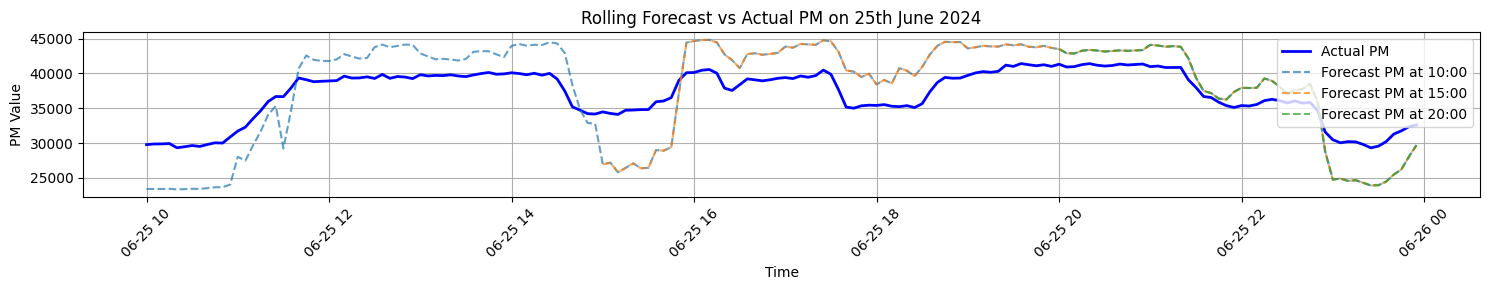

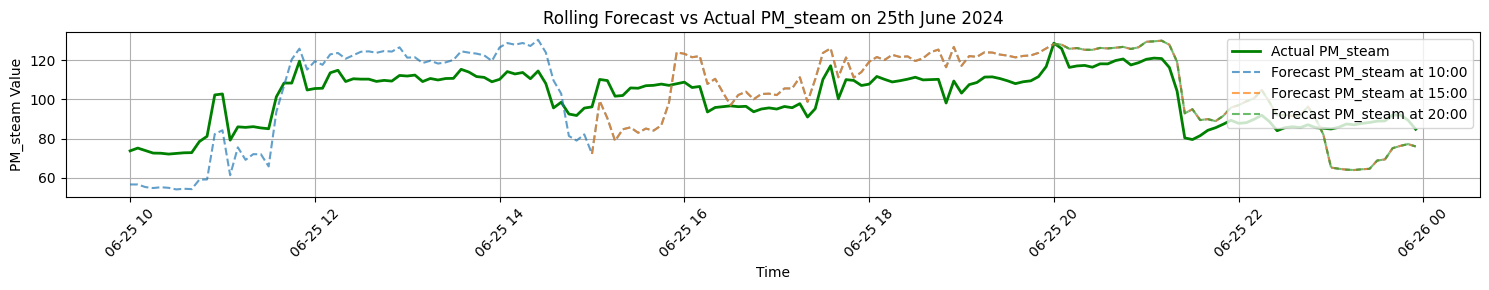

In [16]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import joblib

# Function to make a single prediction
def make_prediction(input_data):
    X_enc = input_data[encoder_features].to_frame().T
    X_pm = input_data[pm_features].to_frame().T
    X_pm_steam = input_data[pm_steam_features].to_frame().T
    
    X_enc_scaled = torch.tensor(scaler_encoder.transform(X_enc), dtype=torch.float32)
    X_pm_scaled = torch.tensor(scaler_pm.transform(X_pm), dtype=torch.float32)
    X_pm_steam_scaled = torch.tensor(scaler_pm_steam.transform(X_pm_steam), dtype=torch.float32)
    
    with torch.no_grad():
        output_pm, output_pm_steam = model(X_enc_scaled, X_pm_scaled, X_pm_steam_scaled)
        combined_output = torch.cat([output_pm, output_pm_steam], dim=1)
        y_pred = scaler_y.inverse_transform(combined_output.numpy())
    return y_pred[0, 0], y_pred[0, 1]  # PM and PM_steam predictions

# Perform rolling forecasts
start_date = pd.Timestamp('2024-06-25 10:00:00')  # Bắt đầu từ 10:00
end_date = pd.Timestamp('2024-06-25 23:55:00')
forecast_interval = pd.Timedelta(minutes=5)

results = []

while start_date <= end_date:
    print(f"Starting forecast from {start_date}")
    
    # Initialize forecast data for this run
    forecast_data = df[df['time_label'] < start_date].copy()
    current_time = start_date
    
    predictions_pm = []
    predictions_pm_steam = []
    actuals_pm = []
    actuals_pm_steam = []
    forecast_times = []
    
    while current_time <= end_date:
        # Get input data for the current time
        input_data = df[df['time_label'] == current_time]
        if input_data.empty:
            print(f"No data available for time {current_time}. Skipping to next interval.")
            current_time += forecast_interval
            continue

        input_data = input_data.iloc[0]

        # Make prediction
        pred_pm, pred_pm_steam = make_prediction(input_data)

        # Store results
        predictions_pm.append(pred_pm)
        predictions_pm_steam.append(pred_pm_steam)
        actuals_pm.append(input_data['PM_5'])
        actuals_pm_steam.append(input_data['PM_steam5'])
        forecast_times.append(current_time)

        # Create a new row for the next time step
        next_time = current_time + forecast_interval
        new_row = input_data.copy()  # Start from the last known input_data
        new_row['time_label'] = next_time
        new_row['PM_5'] = pred_pm
        new_row['PM_steam5'] = pred_pm_steam

        # Dynamically update Weekday, Timesteps, and other relevant features
        new_row['Weekday'] = next_time.weekday()  # Update based on the next time step
        new_row['Timesteps'] = (next_time - pd.Timestamp('2024-06-25 00:00:00')).total_seconds() // 60

        # Append the new row to forecast_data using pd.concat
        forecast_data = pd.concat([forecast_data, new_row.to_frame().T], ignore_index=True)
        
        # Move to next time step
        current_time = next_time

    # Calculate MAPE for this forecast run
    mape_pm = np.mean(np.abs((np.array(actuals_pm) - np.array(predictions_pm)) / np.array(actuals_pm))) * 100
    mape_pm_steam = np.mean(np.abs((np.array(actuals_pm_steam) - np.array(predictions_pm_steam)) / np.array(actuals_pm_steam))) * 100
    
    results.append({
        'start_time': start_date,
        'mape_pm': mape_pm,
        'mape_pm_steam': mape_pm_steam,
        'predictions_pm': predictions_pm,
        'predictions_pm_steam': predictions_pm_steam,
        'actuals_pm': actuals_pm,
        'actuals_pm_steam': actuals_pm_steam,
        'forecast_times': forecast_times
    })
    
    print(f"MAPE for PM: {mape_pm:.2f}%, MAPE for PM_steam: {mape_pm_steam:.2f}%")
    
    # Move to next start time
    start_date += forecast_interval

# Calculate overall average MAPE
avg_mape_pm = np.mean([r['mape_pm'] for r in results])
avg_mape_pm_steam = np.mean([r['mape_pm_steam'] for r in results])

print(f"Overall average MAPE for PM: {avg_mape_pm:.2f}%")
print(f"Overall average MAPE for PM_steam: {avg_mape_pm_steam:.2f}%")

# Vẽ biểu đồ cho PM và PM_steam
import matplotlib.pyplot as plt
import numpy as np

# Lấy tất cả các dự báo và giá trị thực tế
all_predictions_pm = [result['predictions_pm'] for result in results]
all_actuals_pm = [result['actuals_pm'] for result in results]
all_predictions_pm_steam = [result['predictions_pm_steam'] for result in results]
all_actuals_pm_steam = [result['actuals_pm_steam'] for result in results]
forecast_times = [result['forecast_times'] for result in results]

# Xác định các thời điểm cụ thể và các chỉ số tương ứng
specific_times = ['10:00', '15:00', '20:00', '23:00']
specific_time_indices = [0, 60, 120, 180]  # Giả sử các khoảng thời gian 5 phút tương ứng với các chỉ số này

# Đảm bảo các chỉ số nằm trong phạm vi
specific_time_indices = [i for i in specific_time_indices if i < len(all_predictions_pm)]

# Vẽ biểu đồ cho PM
plt.figure(figsize=(15, 3))
plt.plot(forecast_times[0], all_actuals_pm[0], label='Actual PM', color='blue', linewidth=2)

# Vẽ các giá trị dự báo tại các thời điểm chỉ định cho PM
for idx, time_idx in enumerate(specific_time_indices):
    if time_idx < len(all_predictions_pm):
        predictions_pm = all_predictions_pm[time_idx]
        time_label = forecast_times[time_idx]  # Đảm bảo chỉ số chính xác
        plt.plot(time_label, predictions_pm, linestyle='--', label=f'Forecast PM at {specific_times[idx]}', alpha=0.7)

plt.xlabel('Time')
plt.ylabel('PM Value')
plt.title('Rolling Forecast vs Actual PM on 25th June 2024')
plt.legend(loc='upper right')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Vẽ biểu đồ cho PM_steam
plt.figure(figsize=(15, 3))
plt.plot(forecast_times[0], all_actuals_pm_steam[0], label='Actual PM_steam', color='green', linewidth=2)

# Vẽ các giá trị dự báo tại các thời điểm chỉ định cho PM_steam
for idx, time_idx in enumerate(specific_time_indices):
    if time_idx < len(all_predictions_pm_steam):
        predictions_pm_steam = all_predictions_pm_steam[time_idx]
        time_label = forecast_times[time_idx]  # Đảm bảo chỉ số chính xác
        plt.plot(time_label, predictions_pm_steam, linestyle='--', label=f'Forecast PM_steam at {specific_times[idx]}', alpha=0.7)

plt.xlabel('Time')
plt.ylabel('PM_steam Value')
plt.title('Rolling Forecast vs Actual PM_steam on 25th June 2024')
plt.legend(loc='upper right')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Starting forecast from 2024-06-25 10:00:00
MAPE for PM: 10.87%, MAPE for PM_steam: 12.72%
Starting forecast from 2024-06-25 10:05:00
MAPE for PM: 10.80%, MAPE for PM_steam: 12.66%
Starting forecast from 2024-06-25 10:10:00
MAPE for PM: 10.74%, MAPE for PM_steam: 12.58%
Starting forecast from 2024-06-25 10:15:00
MAPE for PM: 10.67%, MAPE for PM_steam: 12.51%
Starting forecast from 2024-06-25 10:20:00
MAPE for PM: 10.60%, MAPE for PM_steam: 12.43%
Starting forecast from 2024-06-25 10:25:00
MAPE for PM: 10.54%, MAPE for PM_steam: 12.36%
Starting forecast from 2024-06-25 10:30:00
MAPE for PM: 10.48%, MAPE for PM_steam: 12.29%
Starting forecast from 2024-06-25 10:35:00
MAPE for PM: 10.42%, MAPE for PM_steam: 12.21%
Starting forecast from 2024-06-25 10:40:00
MAPE for PM: 10.35%, MAPE for PM_steam: 12.13%
Starting forecast from 2024-06-25 10:45:00
MAPE for PM: 10.28%, MAPE for PM_steam: 12.05%
Starting forecast from 2024-06-25 10:50:00
MAPE for PM: 10.22%, MAPE for PM_steam: 11.97%
Starting f

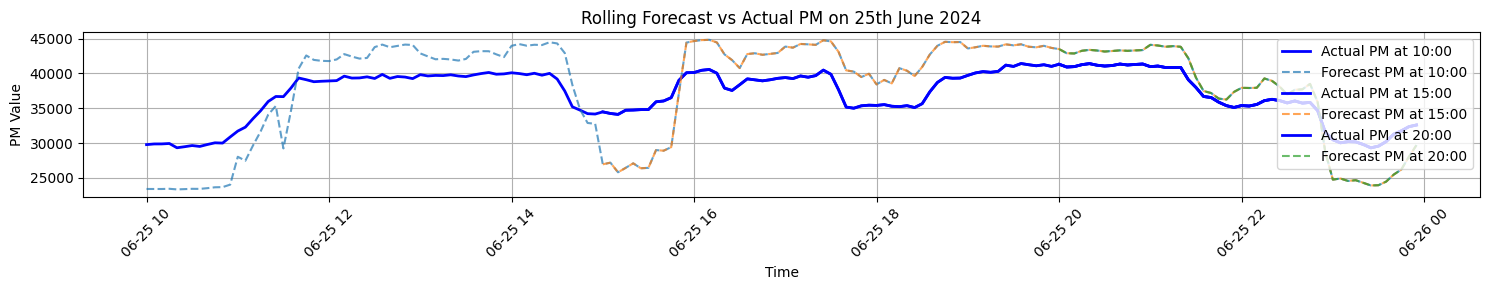

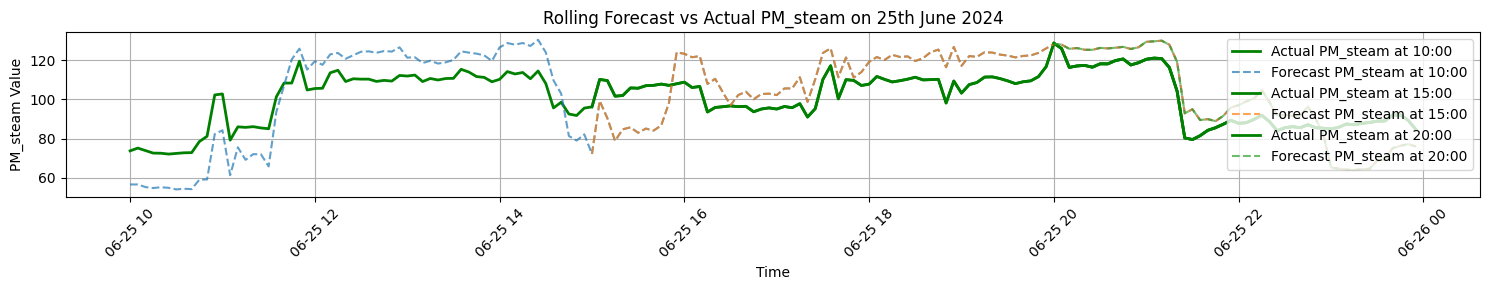

In [17]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import joblib

# Function to make a single prediction
def make_prediction(input_data):
    X_enc = input_data[encoder_features].to_frame().T
    X_pm = input_data[pm_features].to_frame().T
    X_pm_steam = input_data[pm_steam_features].to_frame().T
    
    X_enc_scaled = torch.tensor(scaler_encoder.transform(X_enc), dtype=torch.float32)
    X_pm_scaled = torch.tensor(scaler_pm.transform(X_pm), dtype=torch.float32)
    X_pm_steam_scaled = torch.tensor(scaler_pm_steam.transform(X_pm_steam), dtype=torch.float32)
    
    with torch.no_grad():
        output_pm, output_pm_steam = model(X_enc_scaled, X_pm_scaled, X_pm_steam_scaled)
        combined_output = torch.cat([output_pm, output_pm_steam], dim=1)
        y_pred = scaler_y.inverse_transform(combined_output.numpy())
    return y_pred[0, 0], y_pred[0, 1]  # PM and PM_steam predictions

# Perform rolling forecasts
start_date = pd.Timestamp('2024-06-25 10:00:00')  # Bắt đầu từ 10:00
end_date = pd.Timestamp('2024-06-25 23:55:00')
forecast_interval = pd.Timedelta(minutes=5)

results = []

while start_date <= end_date:
    print(f"Starting forecast from {start_date}")
    
    # Initialize forecast data for this run
    forecast_data = df[df['time_label'] < start_date].copy()
    current_time = start_date
    
    predictions_pm = []
    predictions_pm_steam = []
    actuals_pm = []
    actuals_pm_steam = []
    forecast_times = []
    
    while current_time <= end_date:
        # Get input data for the current time
        input_data = df[df['time_label'] == current_time]
        if input_data.empty:
            print(f"No data available for time {current_time}. Skipping to next interval.")
            current_time += forecast_interval
            continue

        input_data = input_data.iloc[0]

        # Make prediction
        pred_pm, pred_pm_steam = make_prediction(input_data)

        # Store results
        predictions_pm.append(pred_pm)
        predictions_pm_steam.append(pred_pm_steam)
        actuals_pm.append(input_data['PM_5'])
        actuals_pm_steam.append(input_data['PM_steam5'])
        forecast_times.append(current_time)

        # Create a new row for the next time step
        next_time = current_time + forecast_interval
        new_row = input_data.copy()  # Start from the last known input_data
        new_row['time_label'] = next_time
        new_row['PM_5'] = pred_pm
        new_row['PM_steam5'] = pred_pm_steam

        # Dynamically update Weekday, Timesteps, and other relevant features
        new_row['Weekday'] = next_time.weekday()  # Update based on the next time step
        new_row['Timesteps'] = (next_time - pd.Timestamp('2024-06-25 00:00:00')).total_seconds() // 60

        # Append the new row to forecast_data using pd.concat
        forecast_data = pd.concat([forecast_data, new_row.to_frame().T], ignore_index=True)
        
        # Move to next time step
        current_time = next_time

    # Calculate MAPE for this forecast run
    mape_pm = np.mean(np.abs((np.array(actuals_pm) - np.array(predictions_pm)) / np.array(actuals_pm))) * 100
    mape_pm_steam = np.mean(np.abs((np.array(actuals_pm_steam) - np.array(predictions_pm_steam)) / np.array(actuals_pm_steam))) * 100
    
    results.append({
        'start_time': start_date,
        'mape_pm': mape_pm,
        'mape_pm_steam': mape_pm_steam,
        'predictions_pm': predictions_pm,
        'predictions_pm_steam': predictions_pm_steam,
        'actuals_pm': actuals_pm,
        'actuals_pm_steam': actuals_pm_steam,
        'forecast_times': forecast_times
    })
    
    print(f"MAPE for PM: {mape_pm:.2f}%, MAPE for PM_steam: {mape_pm_steam:.2f}%")
    
    # Move to next start time
    start_date += forecast_interval

# Calculate overall average MAPE
avg_mape_pm = np.mean([r['mape_pm'] for r in results])
avg_mape_pm_steam = np.mean([r['mape_pm_steam'] for r in results])

print(f"Overall average MAPE for PM: {avg_mape_pm:.2f}%")
print(f"Overall average MAPE for PM_steam: {avg_mape_pm_steam:.2f}%")

# Vẽ biểu đồ cho PM và PM_steam
import matplotlib.pyplot as plt
import numpy as np

# Lấy tất cả các dự báo và giá trị thực tế
all_predictions_pm = [result['predictions_pm'] for result in results]
all_actuals_pm = [result['actuals_pm'] for result in results]
all_predictions_pm_steam = [result['predictions_pm_steam'] for result in results]
all_actuals_pm_steam = [result['actuals_pm_steam'] for result in results]
forecast_times = [result['forecast_times'] for result in results]

# Xác định các thời điểm cụ thể và các chỉ số tương ứng
specific_times = ['10:00', '15:00', '20:00', '23:00']
specific_time_indices = [0, 60, 120, 180]  # Giả sử các khoảng thời gian 5 phút tương ứng với các chỉ số này

# Đảm bảo các chỉ số nằm trong phạm vi
specific_time_indices = [i for i in specific_time_indices if i < len(all_predictions_pm)]

# Vẽ biểu đồ cho PM
plt.figure(figsize=(15, 3))
for idx, time_idx in enumerate(specific_time_indices):
    if time_idx < len(all_predictions_pm):
        plt.plot(forecast_times[time_idx], all_actuals_pm[time_idx], label=f'Actual PM at {specific_times[idx]}', color='blue', linewidth=2)
        predictions_pm = all_predictions_pm[time_idx]
        time_label = forecast_times[time_idx]  # Đảm bảo chỉ số chính xác
        plt.plot(time_label, predictions_pm, linestyle='--', label=f'Forecast PM at {specific_times[idx]}', alpha=0.7)

plt.xlabel('Time')
plt.ylabel('PM Value')
plt.title('Rolling Forecast vs Actual PM on 25th June 2024')
plt.legend(loc='upper right')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Vẽ biểu đồ cho PM_steam
plt.figure(figsize=(15, 3))
for idx, time_idx in enumerate(specific_time_indices):
    if time_idx < len(all_predictions_pm_steam):
        plt.plot(forecast_times[time_idx], all_actuals_pm_steam[time_idx], label=f'Actual PM_steam at {specific_times[idx]}', color='green', linewidth=2)
        predictions_pm_steam = all_predictions_pm_steam[time_idx]
        time_label = forecast_times[time_idx]  # Đảm bảo chỉ số chính xác
        plt.plot(time_label, predictions_pm_steam, linestyle='--', label=f'Forecast PM_steam at {specific_times[idx]}', alpha=0.7)

plt.xlabel('Time')
plt.ylabel('PM_steam Value')
plt.title('Rolling Forecast vs Actual PM_steam on 25th June 2024')
plt.legend(loc='upper right')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()